# AtliQ0 Bank Credit Card Project
## Phase 1: Figure out the target market

The main task of the phase is to analyze the data and determine the target audience for our product. Includes:

**1) Data preparation**

1.1 Data cleaning (Handling Null Values),

1.2 Outlier Treatment (IQR, STD DEV, Mode),

1.3 Data Visualization (Histogram, Countplots)

**2) Data analysis**

2.1 Distributions (Normal, Skewness),

2.2 Exploratory analysis (Pandas, Seaborn, Matplotlib),

2.3 Measures of Central Tendency, Measures of Dispersion


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Explore Customers Table**

In [2]:
# Loading data
df_cust = pd.read_csv("customers.csv")
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,NaN,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,NaN,Married


In [3]:
# Loading data
df_cr = pd.read_csv("credit_profiles.csv")
df_cr

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [4]:
# Loading data
df_trans = pd.read_csv("transactions.csv")
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,NaN,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [5]:
df_trans.shape

(500000, 7)

In [6]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [8]:
# Explore for Nan values
df_cust.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [10]:
# Group customers by occupation and finding median income
occ_med = df_cust.groupby("occupation")["annual_income"].median()

In [11]:
def get_med_val(row):
  if pd.isnull(row["annual_income"]):
    return occ_med[row["occupation"]]
  else:
    return row["annual_income"]

In [12]:
# Filling Nan values with median income based on occupation
df_cust["annual_income"] = df_cust.apply(get_med_val, axis=1)
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married


In [13]:
df_cust.iloc[[14,82], 6]

14    45794.0
82    46759.0
Name: annual_income, dtype: float64

In [14]:
df_cust[df_cust.annual_income < 1000]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [16]:
# Change outlier values
for index, row in df_cust.iterrows():
  if row["annual_income"] < 100:
    df_cust.at[index, "annual_income"] = occ_med[[row['occupation']]]
df_cust.iloc[[31,262]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married


In [17]:
occ_mean = df_cust.groupby("occupation")["annual_income"].mean()

<ipython-input-18-f8f9fb6de421>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occ_mean.index, y=occ_mean.values,palette="tab10")


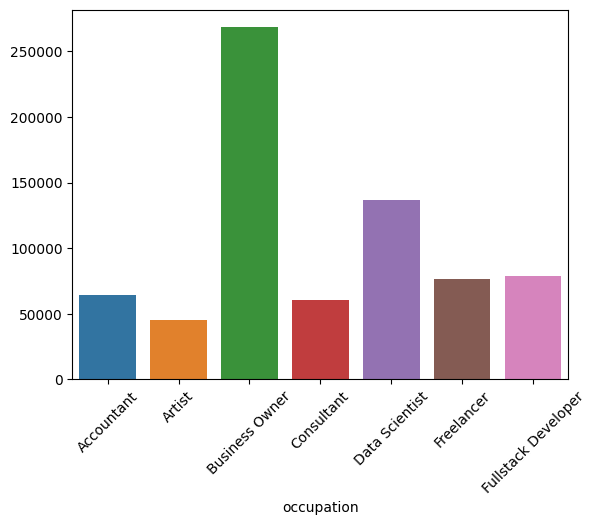

In [18]:
# PLoting mean income based on occupation
sns.barplot(x=occ_mean.index, y=occ_mean.values,palette="tab10")
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-c705aab4d40a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_group.index, y=avg_group.values,palette="tab10")


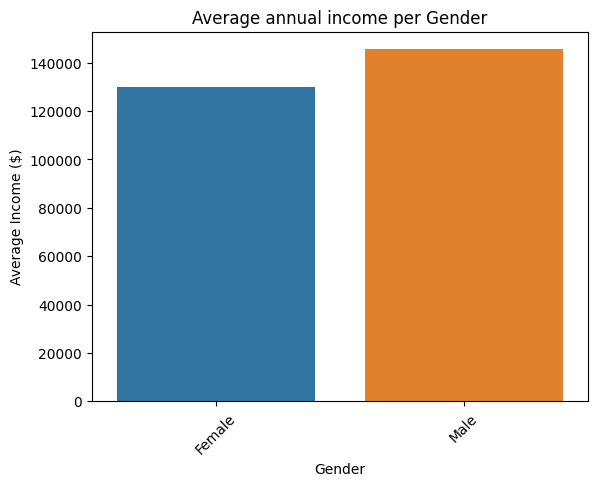

<ipython-input-22-c705aab4d40a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_group.index, y=avg_group.values,palette="tab10")


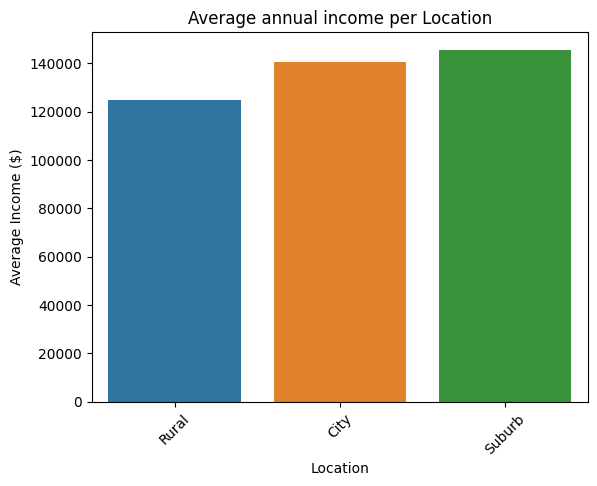

<ipython-input-22-c705aab4d40a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_group.index, y=avg_group.values,palette="tab10")


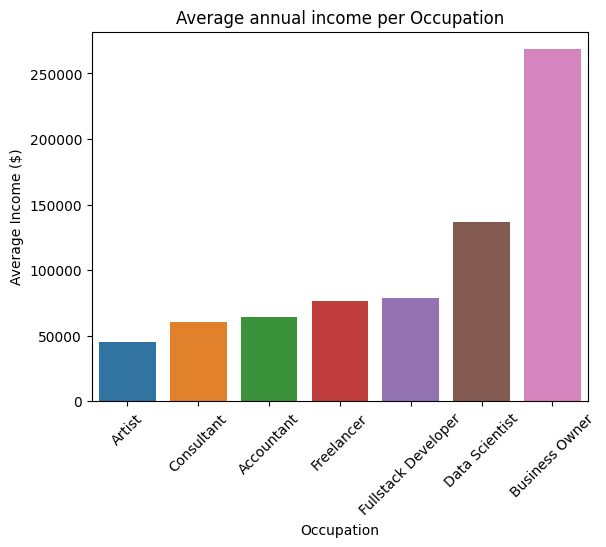

<ipython-input-22-c705aab4d40a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_group.index, y=avg_group.values,palette="tab10")


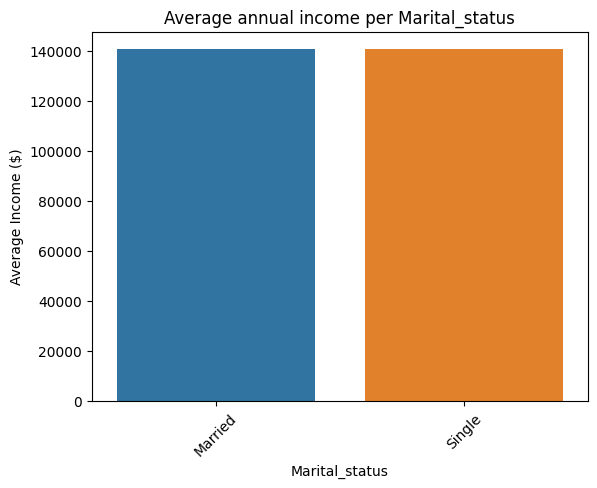

In [22]:
# Ploting average income based on "gender", "location", "occupation" and "marital_status"
cat_columns = ["gender", "location", "occupation", "marital_status"]

for col in cat_columns:
  avg_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
  sns.barplot(x=avg_group.index, y=avg_group.values,palette="tab10")
  plt.xticks(rotation=45)
  plt.title(f'Average annual income per {col.capitalize()}')
  plt.xlabel(col.capitalize())
  plt.ylabel("Average Income ($)")
  plt.show()

In [23]:
# Filling age outliers
med_age_occ = df_cust.groupby("occupation")["age"].median()
out_age = df_cust[(df_cust.age <15) | (df_cust.age >80)]

for index, row in out_age.iterrows():
  df_cust.at[index, "age"] = med_age_occ[row["occupation"]]

In [24]:
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [25]:
# Deviding customers by age groups
bin_edges = [17,25,48,65]
bil_labels = ['18-25', '26-48', '49-65']

df_cust["age_group"] = pd.cut(df_cust["age"], bins=bin_edges, labels=bil_labels)
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


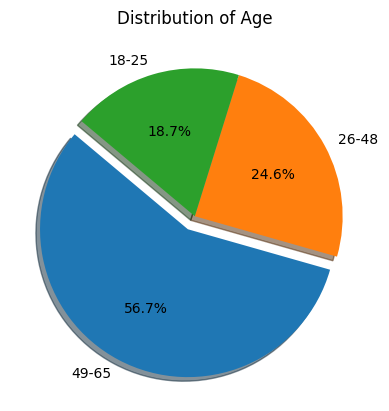

In [27]:
# Ploting age distribution
pie_counts = df_cust.age_group.value_counts(normalize=True)*100

plt.pie(
    pie_counts,
    labels=df_cust.age_group.unique(),
    autopct='%1.1f%%',
    shadow=True,
    explode=(0.1, 0, 0),
    startangle = 140)
plt.title("Distribution of Age")
plt.show()

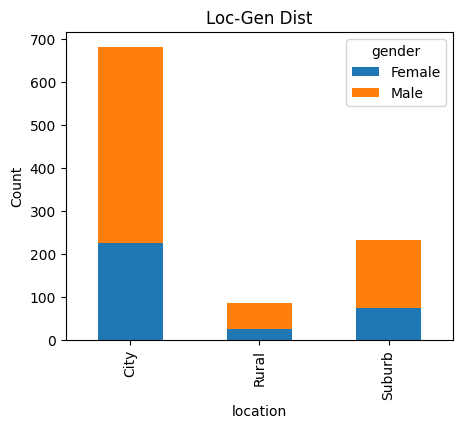

In [28]:
# Ploting location-gender distribution
cust_loc_gender = df_cust.groupby(['location', 'gender']).size().unstack()

cust_loc_gender.plot(kind='bar', stacked=True, figsize=(5,4))

plt.title("Loc-Gen Dist")
plt.ylabel("Count")
plt.show()

**Explore Credit Score Table**

In [29]:
df_cr.shape

(1004, 6)

In [31]:
# Check for duplicated rows
df_cr[df_cr.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [32]:
# Drop duplicates
df_cr_clean = df_cr.drop_duplicates(subset="cust_id", keep="last")
df_cr_clean.shape

(1000, 6)

In [33]:
# Checking for null credit limit values
df_cr_clean[df_cr_clean["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [35]:
# Deviding by credit score ranges
bin_ranges = [299,450,550,600,650,700,750,800]
bin_label = [f'{start}-{end-1}' for start, end in zip(bin_ranges,bin_ranges[1:])]

df_cr_clean["score_range"] = pd.cut(df_cr_clean["credit_score"],bins=bin_ranges,labels=bin_label)
df_cr_clean["score_range"].value_counts().sum()

<ipython-input-35-540eed61ab57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr_clean["score_range"] = pd.cut(df_cr_clean["credit_score"],bins=bin_ranges,labels=bin_label)


1000

In [36]:
# Group by score range finding optimal credit limit
mod_credit_group = df_cr_clean.groupby("score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
mod_credit_group

,score_range,credit_limit
0,299-449,500.0
1,450-549,1000.0
2,550-599,1250.0
3,600-649,1500.0
4,650-699,20000.0
5,700-749,40000.0
6,750-799,60000.0


In [37]:
df_clean_2 = pd.merge(df_cr_clean, mod_credit_group, on="score_range", suffixes=("", "_mode"))

In [38]:
# Fill Nan values
df_clean_3 = df_clean_2.copy()
df_clean_3['credit_limit'].fillna(df_clean_3['credit_limit_mode'], inplace=True)
df_clean_3.shape

(1000, 8)

In [39]:
df_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19735.000000,19754.000000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24716.483459,24701.959351
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,1000.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


<Axes: ylabel='outstanding_debt'>

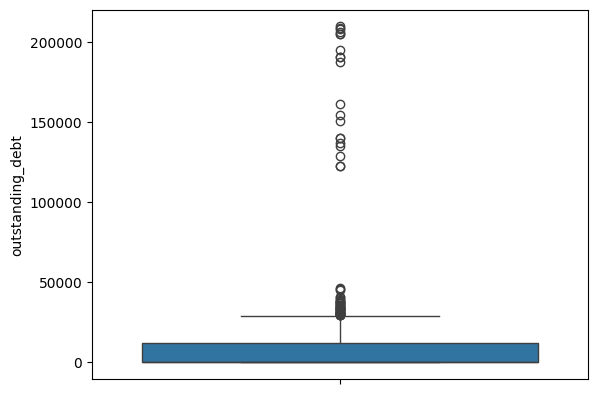

In [40]:
# Ploting Box plot showing outliers
sns.boxplot(df_clean_3.outstanding_debt)

In [41]:
df_clean_3.loc[df_clean_3.outstanding_debt>df_clean_3.credit_limit, "outstanding_debt"] = df_clean_3["credit_limit"]

In [42]:
df_merged = df_cust.merge(df_clean_3, on="cust_id", how="inner")
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,450-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,450-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,450-549,1000.0
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


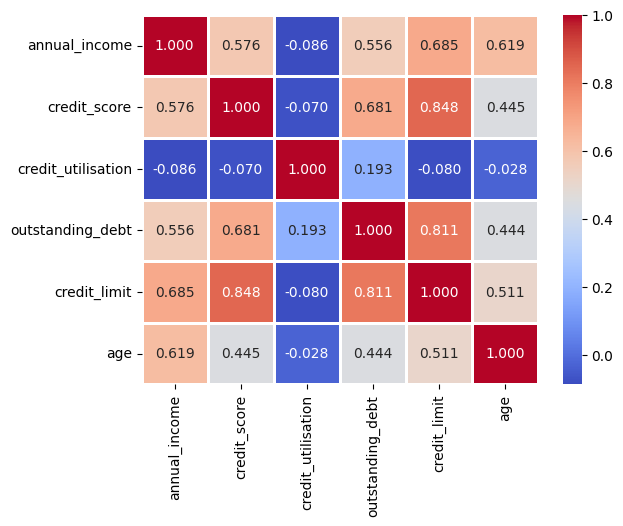

In [44]:
# Ploting corr. matrix
num_col = ['annual_income', 'credit_score', 'credit_utilisation', "outstanding_debt",	"credit_limit", "age"]
corr_matrix = df_merged[num_col].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.8)
plt.show()

In [45]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='tran_amount', ylabel='Count'>

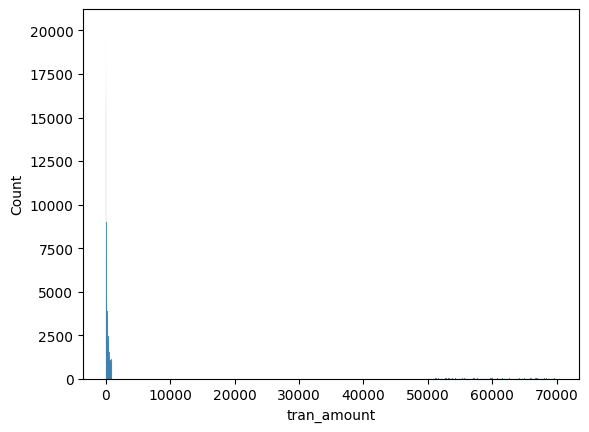

In [46]:
sns.histplot(df_trans.tran_amount)

In [47]:
df_trans.shape

(500000, 7)

In [48]:
# Filling Nan values
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)
df_trans.platform.isnull().sum()

0

In [49]:
# Replacing zeros
df_trans_zero = df_trans[df_trans.tran_amount == 0]
df_trans_1 = df_trans[(df_trans.platform == "Amazon")&(df_trans.product_category == "Electronics")&(df_trans.payment_type == "Credit Card")]
med_non_zero = df_trans_1 [df_trans_1.tran_amount>0].tran_amount.median()
df_trans.tran_amount.replace(0,med_non_zero, inplace=True)

<Axes: xlabel='tran_amount', ylabel='Count'>

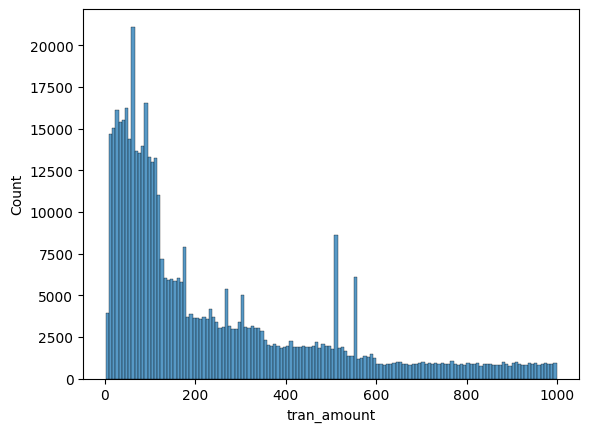

In [50]:
# Detecting outliers using IQR method
Q1, Q3 = df_trans.tran_amount.quantile([0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - 2*IQR
upper= Q3 + 2*IQR

tran_out = df_trans[df_trans.tran_amount > upper]
tran_no_out = df_trans[df_trans.tran_amount <= upper]
prod_cat_mean = tran_no_out.groupby("product_category")["tran_amount"].mean()

for index, row in tran_out.iterrows():
  df_trans.at[index, "tran_amount"] = prod_cat_mean[row["product_category"]]

sns.histplot(df_trans.tran_amount)

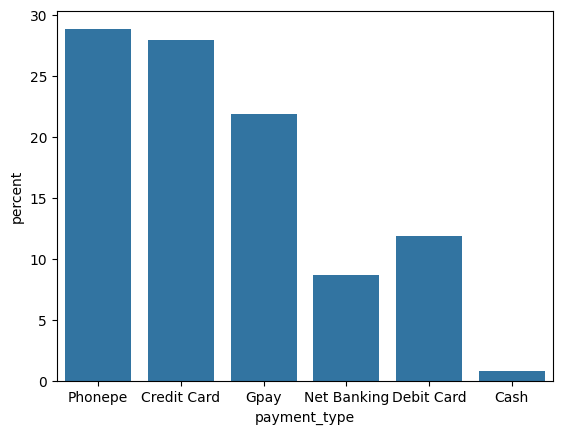

In [53]:
# Plot counting payment types
sns.countplot(x=df_trans.payment_type, stat='percent')
plt.show()

In [54]:
df_cust_trans_merg = pd.merge(df_cust, df_trans, on="cust_id", how='inner')
df_cust_trans_merg.shape

(500000, 15)

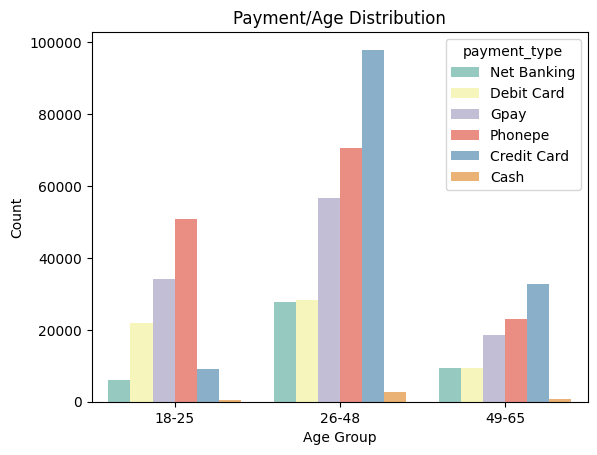

In [55]:
# Ploting Payment/Age distribution
sns.countplot(x=df_cust_trans_merg.age_group, hue=df_cust_trans_merg.payment_type, data= df_cust_trans_merg, palette='Set3')
plt.title("Payment/Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

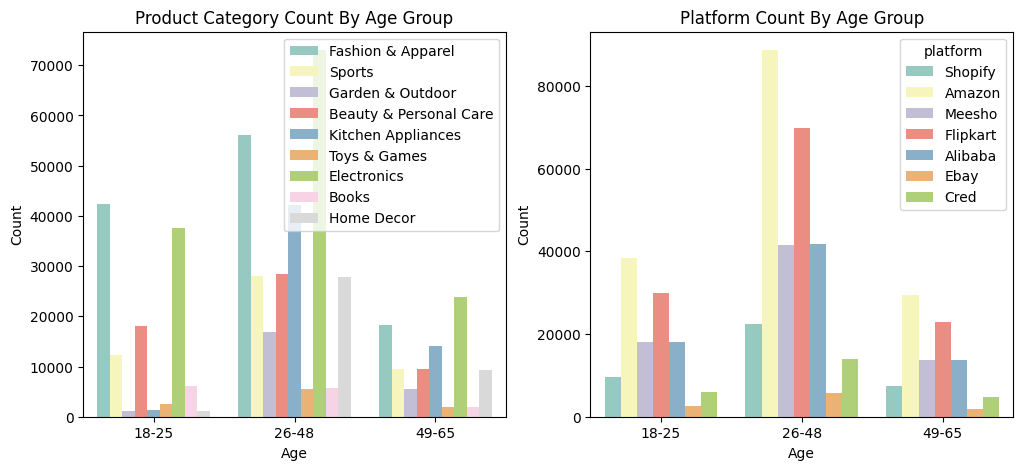

In [ ]:
# Ploting Product/Age and Platform/Age distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue='product_category', data= df_cust_trans_merg, ax=ax1, palette='Set3')
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.legend(loc="upper right")

sns.countplot(x="age_group", hue="platform", data= df_cust_trans_merg, ax=ax2, palette='Set3')
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")

# Conclusion:

After analysis and indicative visualization, we can conclude that the target audience for our project will be people in the age group from 18 to 25 years. Since we are about to launch a credit card, you can see that people in this age group are using them less so far, this means that there will be less competition when we launch our card.

Also, because of the other graphs, we can more successfully build a marketing strategy for our project. For example, depending on which platforms customers use more or what products they buy more, you can offer attractive offers to new users.